<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360"/>

## Exploratory Data Analysis on EPL

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)
    - 3.1 [Description the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
4. [Data Preprocessing](#section4)<br/>
    - 4.1 .[Data Preprocessing](#section401)<br/>
    - 4.2 .[Pandas Profiling after Data Preprocessing](#section402)<br/>
5. [Exploratory Data Analysis](#section5)
    - 5.1 [Find out the relation between HTR & FTR](#section501)<br/>
    - 5.2 [Check FTR & HTR Statistics](#section502)<br/>
    - 5.3 [Check Teamwise Result Statistics](#section503)<br/>
    - 5.4 [Check the Total Number of  Goal scored per Seasons?](#section504)<br/>
    - 5.5 [Teams vs EPL Season Statistics](#section505)<br/>
    - 5.6 [Teams' performance analysis from Goal Statistics](#section506)<br/>
    - 5.7 [EPL League Winners](#section507)<br/>
6. [Conclusions](#section6)<br/>  

<a id=section1></a>
## 1. Problem Statement

This is for Exploratory Data Analysis for Engish Premier league to analyze who has more adavnatage of winning the game - Home Team or Away Team,, the Team startegy in terms of attack and defense, who are the successful teams in EPL.


<img src = 'https://beed.global/wp-content/uploads/2017/10/premier-league-2048x1024.jpg'>

<a id=section2></a>
## 2. Importing Packages

In [40]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')   

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [42]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

Requirement already up-to-date: plotly in c:\users\sudipto\anaconda3\lib\site-packages (4.6.0)


In [43]:
# Install chart_studio, please use this command. 

!pip install chart-studio

In [44]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

<a id=section3></a>
## 3. Loading Data

In [45]:
# Importing the dataset (European Premier League dataset).

df_epl = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/English_Premier_League.csv', encoding='latin-1')
df_epl.head()

ï»¿Div      Date     HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0  E0     14/08/93  Arsenal      Coventry        0     3     A  NaN   NaN     
1  E0     14/08/93  Aston Villa  QPR             4     1     H  NaN   NaN     
2  E0     14/08/93  Chelsea      Blackburn       1     2     A  NaN   NaN     
3  E0     14/08/93  Liverpool    Sheffield Weds  2     0     H  NaN   NaN     
4  E0     14/08/93  Man City     Leeds           1     1     D  NaN   NaN     

   HTR   Season  
0  NaN  1993-94  
1  NaN  1993-94  
2  NaN  1993-94  
3  NaN  1993-94  
4  NaN  1993-94

<a id=section301></a>
### Description of the Dataset

- This dataset provides an **EPL Match Aanalysis** for every EPL sessions.


- Detailed information about each column can be found in the below table


| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| Div                       | The Division/level of League.                                                   | 
| Date                           | Date of the game played.                                                                          | 
| HomeTeam                     | Which Team is hosting the match.                                                        | 
| Away Team                         | Which Away Team is playing against Home Team.                                                     |
| FTHG                        | Full Time Home Goal scored.                                                                   |
| FTAG                      | Full Time Away goal consumed by Home Team.                                                                 |
| FTR                      | Full Time Results.                                                                 |
| HTHG                  | Half Time Home Goal.                                                             |
| HTAG                      | Half Time Away Goal.                                                                 |
| HTR                     | Half Time Results.                                                               |
| Season                  | Year when the game was played.                                                             |                           

In [46]:
df_epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ï»¿Div    9664 non-null   object 
 1   Date      9664 non-null   object 
 2   HomeTeam  9664 non-null   object 
 3   AwayTeam  9664 non-null   object 
 4   FTHG      9664 non-null   int64  
 5   FTAG      9664 non-null   int64  
 6   FTR       9664 non-null   object 
 7   HTHG      8740 non-null   float64
 8   HTAG      8740 non-null   float64
 9   HTR       8740 non-null   object 
 10  Season    9664 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB


- ```info``` function gives us the following insights into the df_menu dataframe:

  - There are a total of **9664 samples (rows)** and **11 columns** in the dataframe.
  
  - There are **4 columns** with a **numeric** datatype and **7 columns** with an **object** datatype.
  
  - There are **0 missing** values in the data.

In [47]:
df_epl.describe(include='all')

ï»¿Div      Date HomeTeam AwayTeam         FTHG         FTAG   FTR  \
count   9664   9664      9664     9664     9664.000000  9664.000000  9664   
unique  1      2572      50       50      NaN          NaN           3      
top     E0     4/4/1994  Arsenal  Arsenal NaN          NaN           H      
freq    9664   11        479      479     NaN          NaN           4461   
mean    NaN    NaN       NaN      NaN      1.523903     1.121482     NaN    
std     NaN    NaN       NaN      NaN      1.301671     1.121667     NaN    
min     NaN    NaN       NaN      NaN      0.000000     0.000000     NaN    
25%     NaN    NaN       NaN      NaN      1.000000     0.000000     NaN    
50%     NaN    NaN       NaN      NaN      1.000000     1.000000     NaN    
75%     NaN    NaN       NaN      NaN      2.000000     2.000000     NaN    
max     NaN    NaN       NaN      NaN      9.000000     8.000000     NaN    

               HTHG         HTAG   HTR   Season  
count   8740.000000  8740.000000  8740  9664     
unique NaN          NaN           3     25       
top    NaN          NaN           D     1994-95  
freq   NaN          NaN           3679  462      
mean    0.685469     0.488444     NaN   NaN      
std     0.833581     0.710524     NaN   NaN      
min     0.000000     0.000000     NaN   NaN      
25%     0.000000     0.000000     NaN   NaN      
50%     0.000000     0.000000     NaN   NaN      
75%     1.000000     1.000000     NaN   NaN      
max     5.000000     5.000000     NaN   NaN

- ```describe``` function gives us the following insights into the data:
  
  - **Total 50 Teams** took particiate in EPL Division E0 legue.

  - The distribution of **FTHG, FTAG, HTHG, HTAG** are **positive (right) skewed** because the **mean** of lies to the **right** of the **median(50%)** value, on a **distribution plot**. 
  
  - The **max** value of **FTHG, FTAG, HTHG, HTAG** is an **outlier** because it lie far away from the mean.


<a id=section302></a>
### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [48]:
# To install pandas profiling please run this command.
!pip install pandas-profiling

In [49]:
import pandas_profiling
df_epl.profile_report(title='Pandas Profiling before Data Preprocessing')

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 11
- Number of observations: 9962
- Missing cells: 2772 (2.6%)


__Variables types__: 
- Numeric = 4
- Categorical = 7
- Text (Unique) = 0
- Rejected = 0


<br>

- **Div** has **constant value "E0"**.
- **Date** has a high cardinality: 2572 distinct values
- **HTHG** has 924 (9.6%) missing values	Missing
- **HTAG** has 924 (9.6%) missing values	Missing
- **HTR** has 924 (9.6%) missing values	Missing


<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Data Preprocessing

- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**.

In [50]:
df_epl.head()

ï»¿Div      Date     HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0  E0     14/08/93  Arsenal      Coventry        0     3     A  NaN   NaN     
1  E0     14/08/93  Aston Villa  QPR             4     1     H  NaN   NaN     
2  E0     14/08/93  Chelsea      Blackburn       1     2     A  NaN   NaN     
3  E0     14/08/93  Liverpool    Sheffield Weds  2     0     H  NaN   NaN     
4  E0     14/08/93  Man City     Leeds           1     1     D  NaN   NaN     

   HTR   Season  
0  NaN  1993-94  
1  NaN  1993-94  
2  NaN  1993-94  
3  NaN  1993-94  
4  NaN  1993-94

- Since the column **Div** has a **constant value** for all the samples, we will drop this column.
- Since The Colun **Date** has high cardinality and does not provide sufficient information in the analysis, we will drop this column as well.

In [51]:
df_epl.drop(['ï»¿Div', 'Date'], 1, inplace=True)

In [52]:
df_epl.head()

HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  HTR   Season
0  Arsenal      Coventry        0     3     A  NaN   NaN    NaN  1993-94
1  Aston Villa  QPR             4     1     H  NaN   NaN    NaN  1993-94
2  Chelsea      Blackburn       1     2     A  NaN   NaN    NaN  1993-94
3  Liverpool    Sheffield Weds  2     0     H  NaN   NaN    NaN  1993-94
4  Man City     Leeds           1     1     D  NaN   NaN    NaN  1993-94

- replacing the missing value of **HTHG, HTAG, HTR** with mode

In [53]:
df_epl['HTHG'] = df_epl['HTHG'].fillna(df_epl['HTHG'].mode()[0])
df_epl['HTAG'] = df_epl['HTAG'].fillna(df_epl['HTAG'].mode()[0])
df_epl['HTR'] = df_epl['HTR'].fillna(df_epl['HTR'].mode()[0])

- create two columns for home and away points to assign numeric values of the Full time and Half time results, Assign 0 if  the result is **'A'**, 2 if the result is **'H'**, 1 if the result is **'D'**

In [54]:
df_epl.loc[df_epl['FTR']=='A', 'FTP']=int(0)
df_epl.loc[df_epl['FTR']=='H', 'FTP']=int(2)
df_epl.loc[df_epl['FTR']=='D', 'FTP']=int(1)

df_epl.loc[df_epl['HTR']=='A', 'HTP']=int(0)
df_epl.loc[df_epl['HTR']=='H', 'HTP']=int(2)
df_epl.loc[df_epl['HTR']=='D', 'HTP']=int(1)

- changing Datatype of **HTHG, HTAG, FTP, HTP** from float to integer since they all repersent integer numbers

In [55]:
df_epl.astype({"HTHG" : int, "HTAG" : int, "FTP" : int, "HTP" : int})

HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR   Season  \
0     Arsenal      Coventry        0     3     A   0     0     D   1993-94   
1     Aston Villa  QPR             4     1     H   0     0     D   1993-94   
2     Chelsea      Blackburn       1     2     A   0     0     D   1993-94   
3     Liverpool    Sheffield Weds  2     0     H   0     0     D   1993-94   
4     Man City     Leeds           1     1     D   0     0     D   1993-94   
...        ...       ...          ..    ..    ..  ..    ..    ..       ...   
9659  Newcastle    Chelsea         3     0     H   1     0     H   2017-18   
9660  Southampton  Man City        0     1     A   0     0     D   2017-18   
9661  Swansea      Stoke           1     2     A   1     2     A   2017-18   
9662  Tottenham    Leicester       5     4     H   1     2     A   2017-18   
9663  West Ham     Everton         3     1     H   1     0     H   2017-18   

      FTP  HTP  
0     0    1    
1     2    1    
2     0    1    
3     2    1    
4     1    1    
...  ..   ..    
9659  2    2    
9660  0    1    
9661  0    0    
9662  2    0    
9663  2    2    

[9664 rows x 11 columns]

In [56]:
df_epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HomeTeam  9664 non-null   object 
 1   AwayTeam  9664 non-null   object 
 2   FTHG      9664 non-null   int64  
 3   FTAG      9664 non-null   int64  
 4   FTR       9664 non-null   object 
 5   HTHG      9664 non-null   float64
 6   HTAG      9664 non-null   float64
 7   HTR       9664 non-null   object 
 8   Season    9664 non-null   object 
 9   FTP       9664 non-null   float64
 10  HTP       9664 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 830.6+ KB


<a id=section402></a>
### 4.2 Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the **output file** as __profiling_after_preprocessing.html__.

In [57]:
import pandas_profiling
df_epl.profile_report(title='Pandas Profiling after Data Preprocessing')

**Observations from Pandas Profiling after Data Processing** <br><br>
__Dataset info__:
- Number of variables: 12
- Number of observations: 9664
- Missing cells: 0 (0.0%)


__Variables types__: 
- Numeric = 4
- Categorical = 8
- Text (Unique) = 0
- Rejected = 0

<a id=section5></a>
## 5. Exploratory Data Analysis

<a id=section501></a>
### 5.1 Find out the relation between HTR & FTR

Text(0.5, 1.0, 'Regplot showing the variation of FTP with HTP')

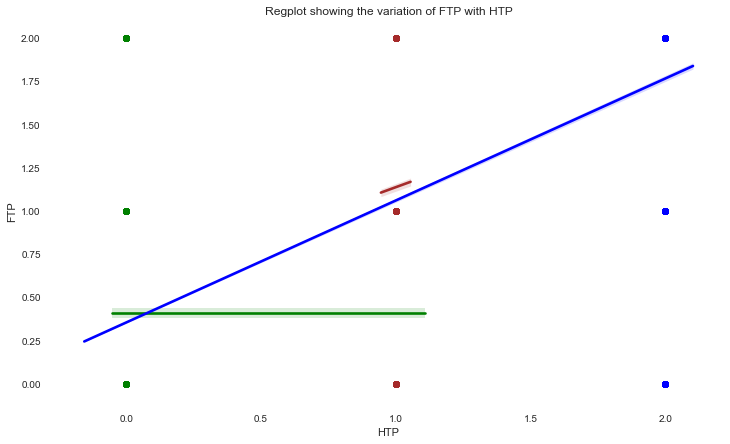

In [58]:
plt.figure(figsize=(12,7))
sns.regplot(data=df_epl[df_epl['HTR']=='D'], x='HTP', y='FTP', color='brown')
sns.regplot(data=df_epl[df_epl['HTR']=='A'], x='HTP', y='FTP', color='green')
sns.regplot(data=df_epl[df_epl['HTR']=='H'], x='HTP', y='FTP', color='blue')
plt.title('Regplot showing the variation of FTP with HTP')

- Full Time Results are positively correlated with Half Time Result, which means Half Time results are likely to stay the same as Full Time Result especially when Home team is winning or match finishing as Draw in Half time, chances of turn-around are not very likely in EPL.

<a id=section502></a>
### 5.2 Check FTR & HTR Statistics

- Using pie plot

Text(0.5, 1.0, 'Pie chart showing the Full Time Results for all EPL matches')

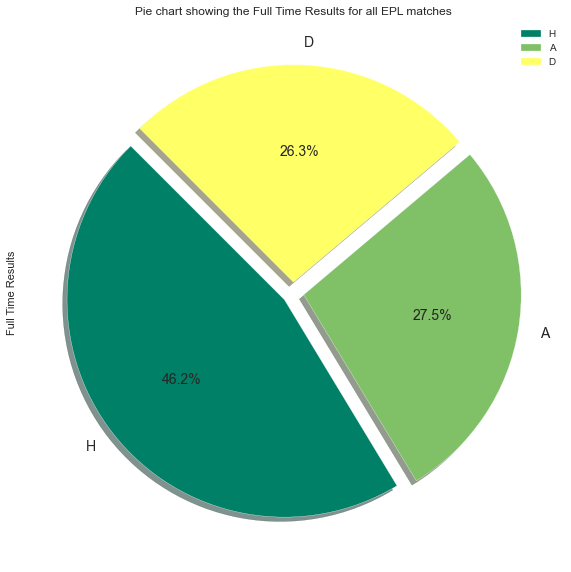

In [59]:
df_epl['FTR'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')
plt.ylabel('Full Time Results')
plt.title('Pie chart showing the Full Time Results for all EPL matches')

- Home Team always has slight advantage of winning the game **(46.2%)**

Text(0.5, 1.0, 'Pie chart showing the Half Time Results for al EPL matches')

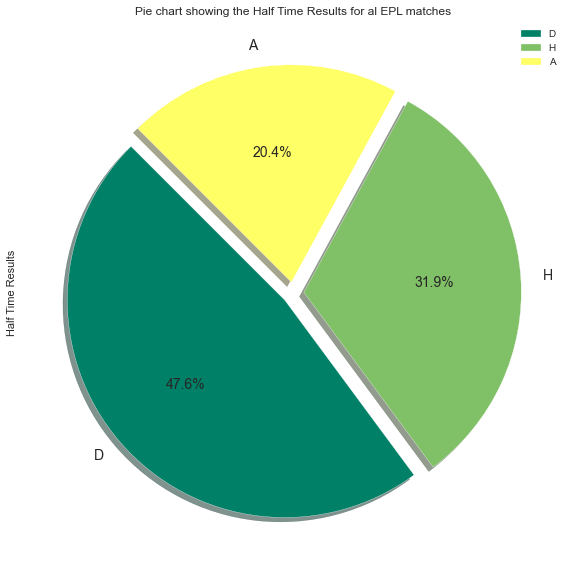

In [60]:
df_epl['HTR'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('Half Time Results')
plt.title('Pie chart showing the Half Time Results for al EPL matches')

- HTR is likely to be Draw **(47.6%)**

<a id=section503></a>
### 5.3 Check Teamwise Result Statistics

We will check which teams in EPL are strong in Home ground and Away ground

Text(0, 0.5, 'Winning Percentage (%)')

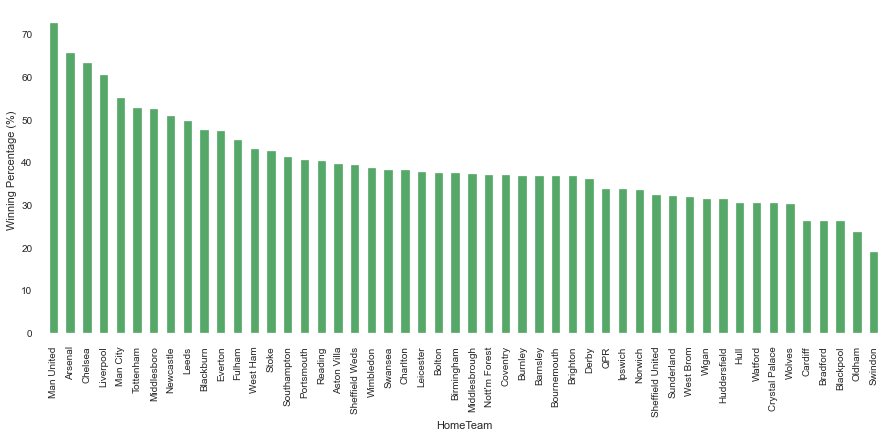

In [61]:
plt.figure(figsize = (15, 6))
((df_epl[(df_epl['FTR']=='H')].groupby('HomeTeam')['FTR'].count()/df_epl.groupby('HomeTeam')['FTR'].count())*100).sort_values(ascending=False).plot(kind='bar', color='g')
plt.ylabel('Winning Percentage (%)')


 - Manchester United is the most successful team in Home Ground. They have more than **70%** winning rate. Few other Succesful teams are **Arsenal, Chelsea, Liverpool, Man City**

Text(0, 0.5, 'Winning Percentage (%)')

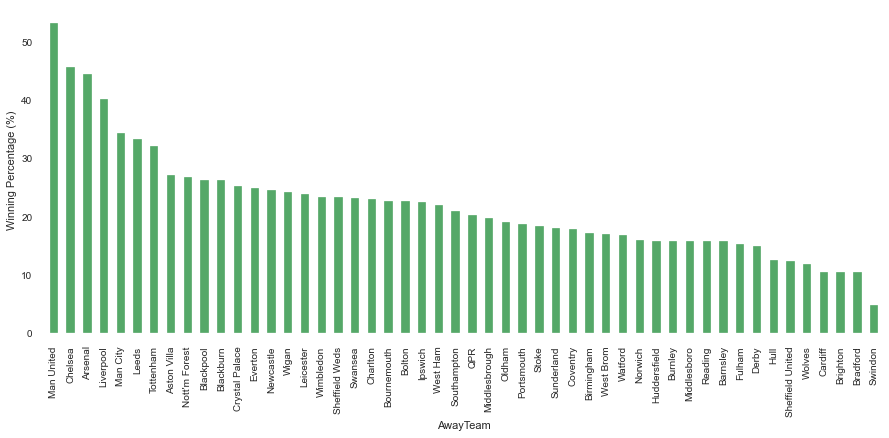

In [62]:
plt.figure(figsize = (15, 6))
((df_epl[(df_epl['FTR']=='A') ].groupby('AwayTeam')['FTR'].count()/df_epl.groupby('AwayTeam')['FTR'].count())*100).sort_values(ascending=False).plot(kind='bar', color='g')
plt.ylabel('Winning Percentage (%)')

 - Manchester United is the most successful team in Away matches. They have more than **50%** winning rate. Few other Succesful teams are **Chelsea, Arsenal, Liverpool, Man City**

<a id=section503></a>
### 5.4 Check the Total Number of  Goal scored per Seasons

Text(0, 0.5, 'Count of Total Goal')

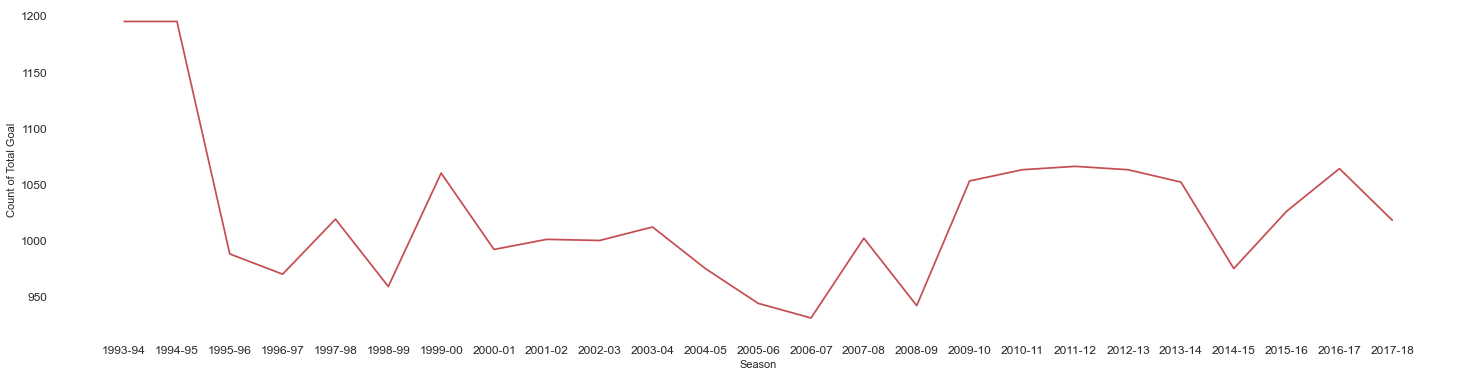

In [63]:
plt.figure(figsize = (25, 6))
(df_epl.groupby('Season')['FTHG'].sum() + df_epl.groupby('Season')['FTAG'].sum()).plot(kind='line', color='r', xticks=np.arange(0, 25, 1), fontsize=12)
plt.ylabel('Count of Total Goal')

- Goal scored in first two EPL sessions are slightly higher, but usually the total goals scored is more or less same in each EPL seasons, so we can not infer anythig from the above figure

<a id=section505></a>
### 5.5 Teams vs EPL Season Statistics

- Modify the existing Data Frame **df_epl** to **df_epl_merge** to get more insights on Team level

In [64]:
df_home=df_epl[['Season','HomeTeam','FTP','HTP','FTHG','FTAG','HTHG','HTAG']].rename(columns={'HomeTeam': 'Team', 'FTP': 'P','HTP': 'HP','FTHG' : 'GF','FTAG' : 'GA','HTHG' : 'HGF','HTAG': 'HGA'})
df_home['Ground']='H'
df_away=df_epl[['Season','AwayTeam','FTP','HTP','FTAG','FTHG','HTAG','HTHG','FTR','HTR']].rename(columns={'AwayTeam': 'Team', 'FTP': 'P','HTP': 'HP','FTAG' :'GF', 'FTHG' : 'GA','HTAG' : 'HGF', 'HTHG' : 'HGA'})
df_away.loc[df_away['FTR']=='H', 'P']=int(0)
df_away.loc[df_away['FTR']=='A', 'P']=int(2)
df_away.loc[df_away['FTR']=='D', 'P']=int(1)
df_away.loc[df_away['HTR']=='H', 'HP']=int(0)
df_away.loc[df_away['HTR']=='A', 'HP']=int(2)
df_away.loc[df_away['HTR']=='D', 'HP']=int(1)
df_away.drop(['FTR', 'HTR'], 1, inplace=True)
df_away['Ground']='A'
df_epl_merge=(pd.concat([df_home, df_away], axis=0))
df_epl_merge.astype({"P" : int, "HP" : int, "HGF" : int, "HGA" : int})

Season         Team  P  HP  GF  GA  HGF  HGA Ground
0     1993-94  Arsenal      0  1   0   3   0    0    H    
1     1993-94  Aston Villa  2  1   4   1   0    0    H    
2     1993-94  Chelsea      0  1   1   2   0    0    H    
3     1993-94  Liverpool    2  1   2   0   0    0    H    
4     1993-94  Man City     1  1   1   1   0    0    H    
...       ...       ...    .. ..  ..  ..  ..   ..   ..    
9659  2017-18  Chelsea      0  0   0   3   0    1    A    
9660  2017-18  Man City     2  1   1   0   0    0    A    
9661  2017-18  Stoke        2  2   2   1   2    1    A    
9662  2017-18  Leicester    0  2   4   5   2    1    A    
9663  2017-18  Everton      0  0   1   3   0    1    A    

[19328 rows x 9 columns]

- Detailed information about each column can be found in the below table


| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| Season                  | Year when the game was played.
| Team                     | Team of EPL.                                                        | 
| P                        | Match Resuts. 2 - win, 1 - Draw, 0- lost.                                                                   |
| HP                      | Half Time Resuts 2 - win, 1 - Draw, 0- lost.                                                                 |
| GF                      | Goal Scored.                                                                 
| GA                      | Goal Consumed.                                                                 ||
| HGF                  | Half Time Goal Scored.                                                             |
| HGA                  | Goal Consumed in Half Time.                                                             |
| Ground                      | Where the Match is being played; home or away.                                                                 |

In [65]:
pd.crosstab([df_epl_merge.Team, df_epl_merge.Ground], df_epl_merge.Season, margins=True).apply(lambda r: r, axis=1).style.background_gradient(cmap='autumn_r')

- Each team will play equal number of Home and Away matches with each other.
- **Arsenal, Man United, Liverpool, Chelsea** appeared in all EPL seasons.
- Total 20 teams played in EPL except **1993-94, 1994-95** where total 22 teams have played.

<a id=section506></a>
### 5.6 Teams' performance analysis from Goal Statistics

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

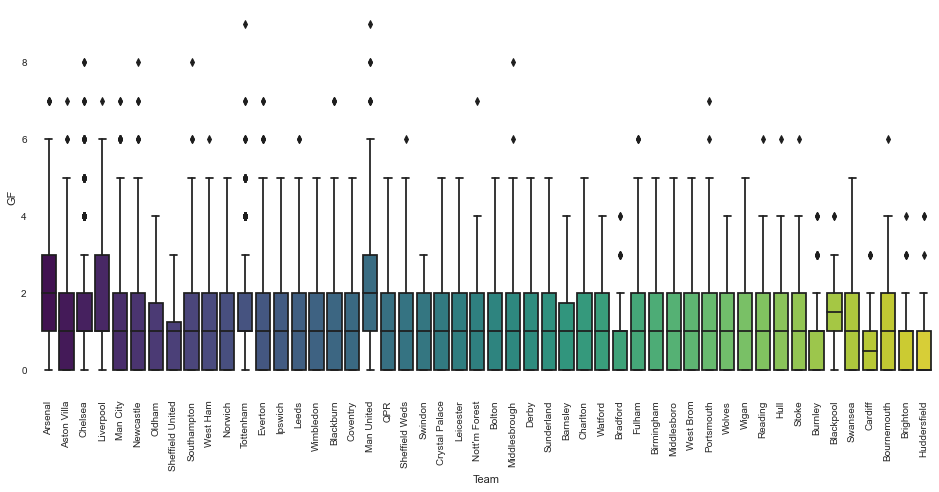

In [66]:
plt.figure(figsize=(16,7))
sns.boxplot(data=df_epl_merge, x='Team', y='GF', palette='viridis', width=0.8)
plt.xticks(rotation=90)

- **Man United & Arsenal** goal score rate is close **2 (median)**  goals per game which means they have a good side to play attacking football.


- Teams, good in attack/score Goals (normally score 1-3 goals per game) are
        - Man United
        - Arsenal
        - Liverpool

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

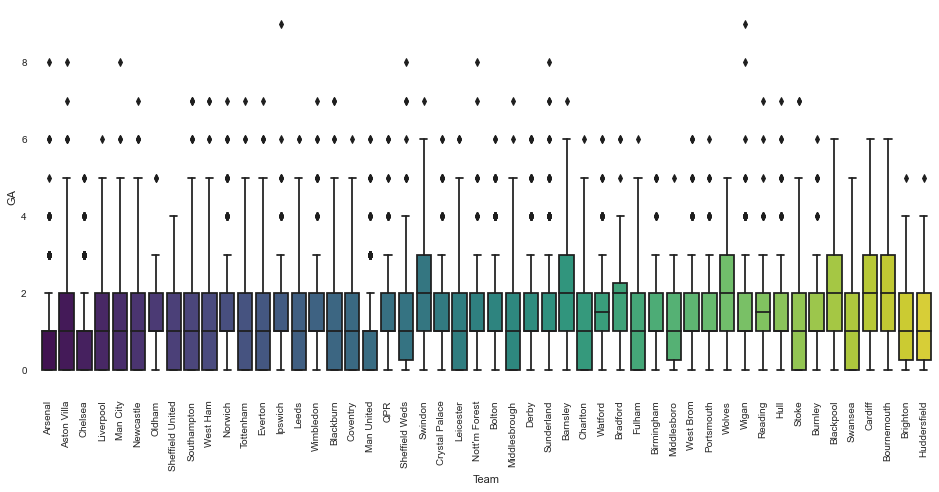

In [67]:
plt.figure(figsize=(16, 7))
sns.boxplot(data=df_epl_merge, x='Team', y='GA', palette='viridis', width=0.8)
plt.xticks(rotation=90)

- **Arsenal, Chelsea & Man United** goal consumed (GA) rate is **0 (median)** goal per game which means their defense is very strong.


- Teams, good in defense (normally consume 0-1 goal per game) are
        - Man United
        - Chelsea
        - Arsenal

<a id=section507></a>
### 5.7 EPL League Winners

- Check the Total Number of Teams Participated in EPL

In [68]:
df_epl_merge.groupby(['Team']).Team.unique().count()

50

- Check EPL winners

In [69]:
df_epl_table=df_epl_merge.groupby(['Season','Team']).P.sum().astype(int).reset_index().sort_values(by=['Season','P'], ascending =[True,False])
df_epl_winners=df_epl_table.groupby(['Season'])['Team'].first().reset_index()
df_epl_winners.groupby(['Team']).Season.count()

Team
Arsenal       3 
Blackburn     1 
Chelsea       6 
Leicester     1 
Man City      3 
Man United    11
Name: Season, dtype: int64

- **Man United** is the most successful team, they have won EPL league for **11** times, then **Chelsea** (**6** times), **Arsenal, Man City** (**3** times each). As of now, total 6 teams have won EPL out of 50 teams.

<a id=section6></a>
## 6. Conclusions

- Total **20** Teams play in EPL every season, every teams plays twice with each other, one in home ground and other one in away ground.
- Full Time Result **(FTR)** are heavily depending on Half Time Result **(HTR)** especially when Home team is leading or match ending in Draw during first half
- **Man United, Arsenal & Liverpool** are good attacking sides among all the EPL teams, they normally score 1-3 goals per match.
- **Man United, Chelsea & Arsenal** are good in defense, they normally consume 0-1 goal per match.
- **Man United, Arsenal, Chelsea, Liverpool, Man City** are the most successful teams in EPL history in terms of winning &  **Arsenal, Man United, Liverpool, Chelsea** appeared in all EPL seasons.
- Total **50** Teams have participated in EPL so far, but ony 6 teams have won the EPL and they are **Man United, Chelsea, Arsenal, Man City, Leicester, Blackburn**.